In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [15]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.layer1 = nn.Linear(10, 5)
        self.layer2 = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.layer2(x)
        return x

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LinearModel().to(device)
loss_fn = nn.MSELoss()

## Optimizers

In [17]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer = optim.RMSprop(model.parameters(), lr=0.01)
optimizer = optim.Adagrad(model.parameters(), lr=0.01)
optimizer = optim.AdamW(model.parameters(), lr=0.001)

optimizer.zero_grad()
optimizer.step()

## Step LR

In [18]:
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

In [20]:
inputs = torch.randn(100, 10).to(device)
targets = torch.randn(100, 1).to(device)

losses = []

for epoch in range(1, 101):
    model.train()
    optimizer.zero_grad()

    outputs = model(inputs)
    loss = loss_fn(outputs, targets)
    losses.append(loss.item())

    loss.backward()
    optimizer.step()
    scheduler.step()
    
    if epoch % 10 == 0:
        print(f"Epoch [{epoch}/{100}], Loss: {loss.item():.4f}, Learning Rate: {scheduler.get_last_lr()[0]}")

Epoch [10/100], Loss: 1.0462, Learning Rate: 0.001
Epoch [20/100], Loss: 1.0308, Learning Rate: 0.0001
Epoch [30/100], Loss: 1.0280, Learning Rate: 0.0001
Epoch [40/100], Loss: 1.0265, Learning Rate: 0.0001
Epoch [50/100], Loss: 1.0251, Learning Rate: 1e-05
Epoch [60/100], Loss: 1.0248, Learning Rate: 1e-05
Epoch [70/100], Loss: 1.0247, Learning Rate: 1e-05
Epoch [80/100], Loss: 1.0245, Learning Rate: 1.0000000000000002e-06
Epoch [90/100], Loss: 1.0245, Learning Rate: 1.0000000000000002e-06
Epoch [100/100], Loss: 1.0245, Learning Rate: 1.0000000000000002e-06


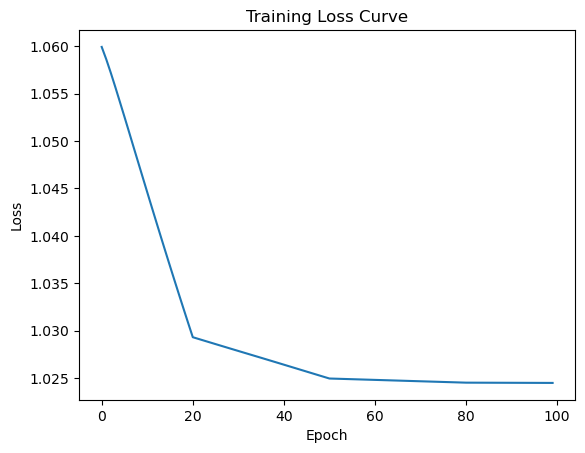

In [21]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()